In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
import pandas as pd

df = pd.read_csv("Bengaluru_House_Data.csv")
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   a

In [ ]:
# Bengaluru Housing Dataset Complete Preprocessing
import pandas as pd
import numpy as np

# 1️⃣ Load dataset
df = pd.read_csv("Bengaluru_House_Data.csv")
print("Initial shape:", df.shape)

# 2️⃣ Drop irrelevant columns
df = df.drop(['area_type','availability','society','size'], axis=1)

# 3️⃣ Handle missing values
df = df.dropna(subset=['location','bath','balcony','total_sqft','price'])

# 4️⃣ Convert 'total_sqft' to numeric (handle ranges)
def convert_sqft(x):
    try:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1]))/2
        else:
            return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df = df.dropna(subset=['total_sqft'])

# 5️⃣ Convert 'size' to 'bhk' (if you have size column, otherwise skip)
# df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
# Since we dropped 'size', we'll create 'bhk' from total_sqft vs price later (or skip if not needed)

# 6️⃣ Outlier removal
# Price per sqft
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']
df = df[(df['price_per_sqft'] > 1000) & (df['price_per_sqft'] < 20000)]

# BHK vs Total_sqft outliers
# Assuming 300 sqft per bedroom minimum
if 'bhk' not in df.columns:
    # Approximate bhk from price_per_sqft? Or you can add manually later
    df['bhk'] = (df['total_sqft']/300).apply(np.floor)
df = df[df['total_sqft']/df['bhk'] >= 300]

# 7️⃣ Clean location
df['location'] = df['location'].apply(lambda x: x.strip())
location_counts = df['location'].value_counts()
rare_locations = location_counts[location_counts <= 10]
df['location'] = df['location'].apply(lambda x: 'other' if x in rare_locations else x)

# One-hot encode locations
dummies = pd.get_dummies(df['location'])
df = pd.concat([df, dummies.drop('other', axis=1)], axis=1)

# 8️⃣ Optional: log-transform price if needed
df['price'] = np.log(df['price'])

# 9️⃣ Final dataset ready
X = df.drop(['price','price_per_sqft','location'], axis=1)
y = df['price']

print("Preprocessed shape:", X.shape)
print("Features:", X.columns)
print("Target sample:\n", y.head())


Initial shape: (13320, 9)
Preprocessed shape: (12434, 235)
Features: Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=235)
Target sample:
 0    3.665355
1    4.787492
2    4.127134
3    4.553877
4    3.931826
Name: price, dtype: float64


In [11]:

print("description")
df.describe()

description


,total_sqft,bath,balcony,price,price_per_sqft,bhk
count,12434.000000,12434.000000,12434.000000,12434.000000,12434.000000,12434.000000
mean,1485.781190,2.583642,1.582677,4.329914,6209.481264,4.520830
std,894.019481,1.147370,0.814072,0.657993,3092.392023,3.006937
min,250.000000,1.000000,0.000000,2.079442,1166.666667,0.000000
25%,1100.000000,2.000000,1.000000,3.891820,4225.352113,3.000000
50%,1260.000000,2.000000,2.000000,4.234107,5319.148936,4.000000
75%,1630.000000,3.000000,2.000000,4.700480,7011.070111,5.000000
max,36000.000000,27.000000,3.000000,7.696213,19965.277778,120.000000


In [18]:
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
corr_matrix = numeric_df.corr()
print(corr_matrix)
numeric_df.corr()['price'].sort_values(ascending=False)



                total_sqft      bath   balcony     price  price_per_sqft  \
total_sqft        1.000000  0.509229  0.186742  0.675580        0.205123   
bath              0.509229  1.000000  0.209294  0.632482        0.425960   
balcony           0.186742  0.209294  1.000000  0.202963        0.031655   
price             0.675580  0.632482  0.202963  1.000000        0.742461   
price_per_sqft    0.205123  0.425960  0.031655  0.742461        1.000000   
bhk               0.994762  0.517624  0.181919  0.679870        0.218836   

                     bhk  
total_sqft      0.994762  
bath            0.517624  
balcony         0.181919  
price           0.679870  
price_per_sqft  0.218836  
bhk             1.000000  


price             1.000000
price_per_sqft    0.742461
bhk               0.679870
total_sqft        0.675580
bath              0.632482
balcony           0.202963
Name: price, dtype: float64

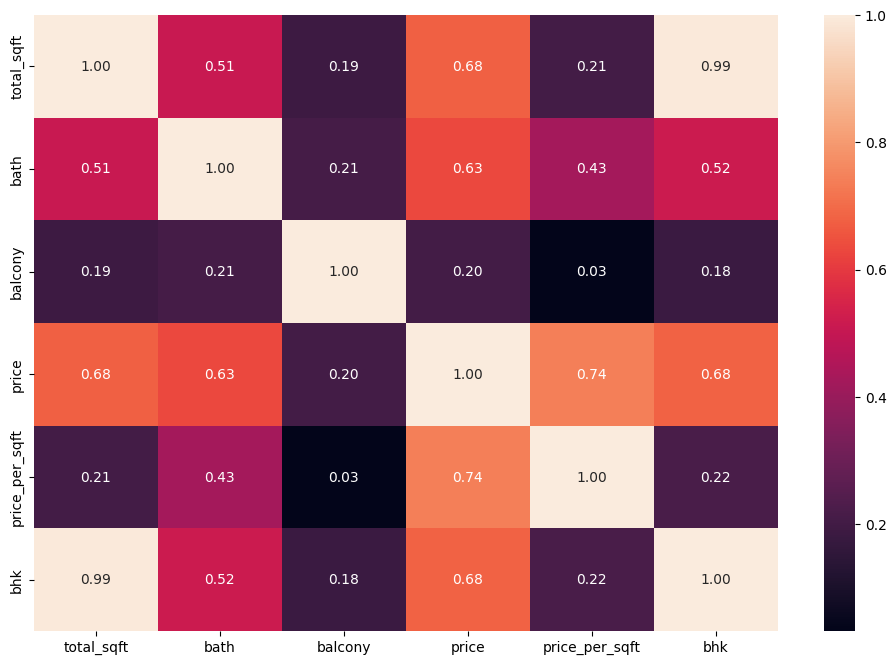

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.show()


In [1]:
import pandas as pd
import numpy as np

# Load dataset (adjust path if needed)
df = pd.read_csv("Bengaluru_House_Data.csv")

# =========================
# 1. PROXIMITY FEATURE
# =========================
# Hardcode MG Road (Bengaluru city center) lat/long
mg_road_coords = (12.9756, 77.6047)

# Approximate lat/long for some major locations (expand as needed)
location_coords = {
    "Whitefield": (12.9698, 77.7499),
    "Sarjapur Road": (12.8971, 77.6820),
    "Electronic City": (12.8412, 77.6636),
    "Hebbal": (13.0350, 77.5970),
    "Yelahanka": (13.1007, 77.5963),
    "Marathahalli": (12.9592, 77.6974),
    "Indira Nagar": (12.9784, 77.6408),
    "HSR Layout": (12.9121, 77.6446)
}

# Function to calculate haversine distance
from math import radians, sin, cos, sqrt, atan2

def haversine(coord1, coord2):
    R = 6371  # Earth radius in km
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    dlat, dlon = lat2 - lat1, lon2 - lon1

    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c  # distance in km

# Map distance to city center (MG Road)
def get_distance_to_center(loc):
    if loc in location_coords:
        return haversine(location_coords[loc], mg_road_coords)
    else:
        return np.nan  # unknown location

df["distance_to_center_km"] = df["location"].apply(get_distance_to_center)

# =========================
# 2. NEIGHBORHOOD FEATURE
# =========================
# First calculate price_per_sqft
df["price_per_sqft"] = df["price"] * 100000 / df["total_sqft"].astype(float)

# Compute average price per sqft per location
location_avg = df.groupby("location")["price_per_sqft"].mean().to_dict()

# Map to dataframe
df["location_avg_price_per_sqft"] = df["location"].map(location_avg)

# =========================
# 3. TEMPORAL FEATURE
# =========================
# Extract year if 'availability' column exists
if "availability" in df.columns:
    # Keep only rows that contain a year (e.g., 'Ready To Move' -> NaN, '2015' -> 2015)
    df["year"] = df["availability"].apply(
        lambda x: int(str(x)) if str(x).isdigit() else np.nan
    )

# =========================
# Final enriched dataset
# =========================
print(df[["location", "distance_to_center_km", "location_avg_price_per_sqft", "year"]].head(10))


ValueError: could not convert string to float: '2100 - 2850'